In [19]:
# Load modules
from __future__ import print_function
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
import os
from statsmodels.tsa import arima_process

In [3]:
# Change working Directory
#Set current directory and work relative to it
os.chdir('E:/gitlab/project_on_python/deep time series forcasting/Practical-Time-Series-Analysis-master')

# Load Dataset
ibm_df = pd.read_csv('datasets/ibm-common-stock-closing-prices.csv')
ibm_df.head()

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


<IPython.core.display.Javascript object>


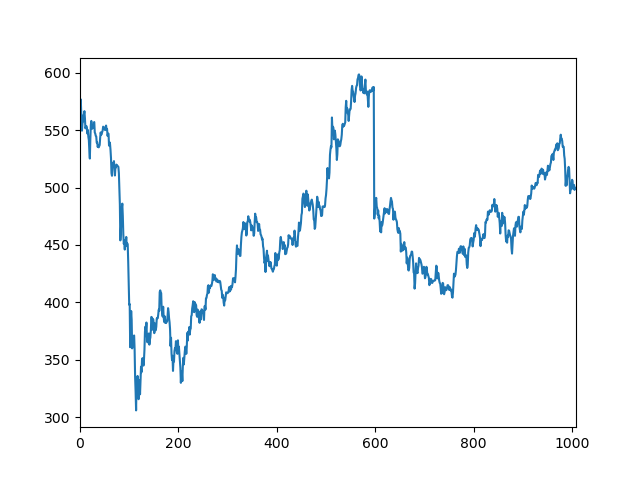

In [4]:
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)
ibm_df.head()
ibm_df.Close_Price.plot()
plt.show()

<IPython.core.display.Javascript object>


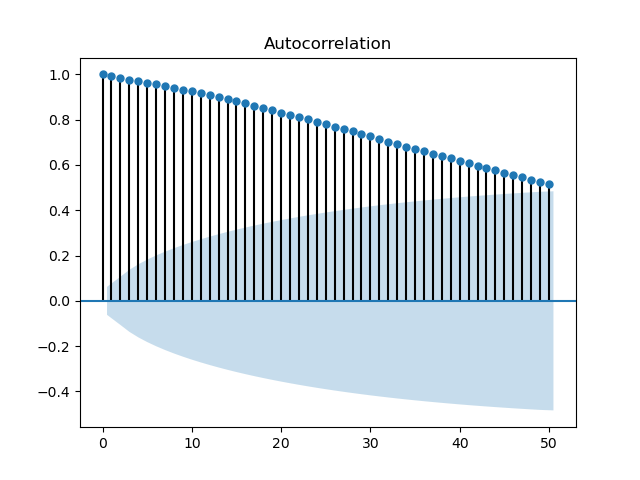

<IPython.core.display.Javascript object>


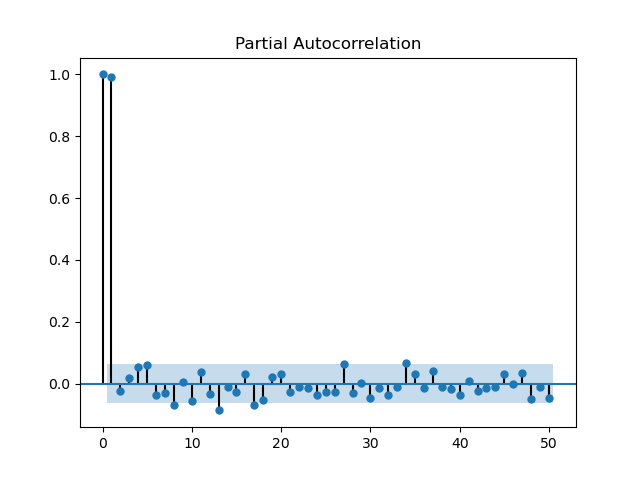

In [5]:
# Plot ACF and PACF
ibm_df=ibm_df.dropna()
plot_acf(ibm_df.Close_Price, lags=50)
plot_pacf(ibm_df.Close_Price, lags=50)
plt.show()

The ACF is linearly decaying, showing a strong serial correlation; however, the partial autocorrelation shows only one step dependency. 

Also, as the chart shows a positive autocorrelation, correction should be done using the AR component with first-order correlation. 

The QQ-plot for the signal helps you evaluate the normality assumption

<IPython.core.display.Javascript object>


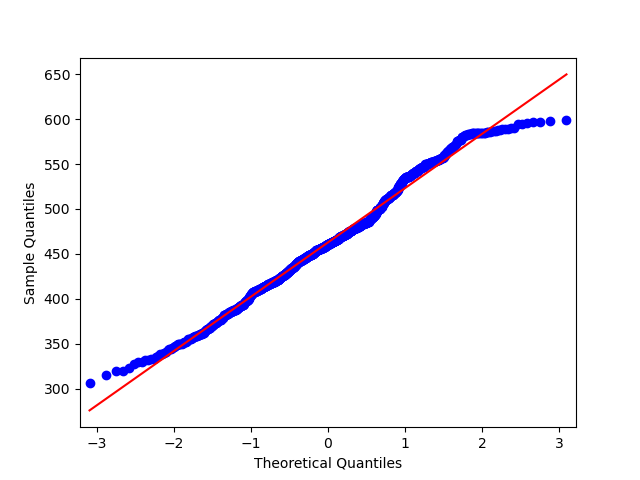

In [7]:
# QQ plot and probability plot
sm.qqplot(ibm_df['Close_Price'], line='s')
plt.show()

# the optimal p and q orders for ARMA

To get the optimal p and q orders for ARMA, a grid search is performed with AIC minimization as the search criteria

In [8]:
# Optimize ARMA parameters
aicVal=[]
for ari in range(1, 3):
    for maj in range(0,3):
        arma_obj = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])

In [10]:
pd.DataFrame(aicVal)

,0,1,2
0,1,0,6702.766710
1,1,1,6704.704834
2,1,2,6706.643594
3,2,0,6704.705793
4,2,1,6705.736900
5,2,2,6707.728890


The ARMA.fit function is used to fit the ARMA forecasting model with defined p and q models using maximum likelihood criteria.

The AIC recommends the ARMA(1,1) model as the optimal model with minimum AIC
value.

In [9]:
# Building optimized model using minimum AIC
arma_obj_fin = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(1, 0)).fit(maxlag=30, method='mle', trend='nc')
ibm_df['ARMA']=arma_obj_fin.predict()
arma_obj_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1008
Model:                     ARMA(1, 0)   Log Likelihood               -3349.383
Method:                           mle   S.D. of innovations              6.683
Date:                Wed, 15 Apr 2020   AIC                           6702.767
Time:                        11:26:15   BIC                           6712.598
Sample:                             0   HQIC                          6706.502
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9999      0.000   9223.136      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

<IPython.core.display.Javascript object>


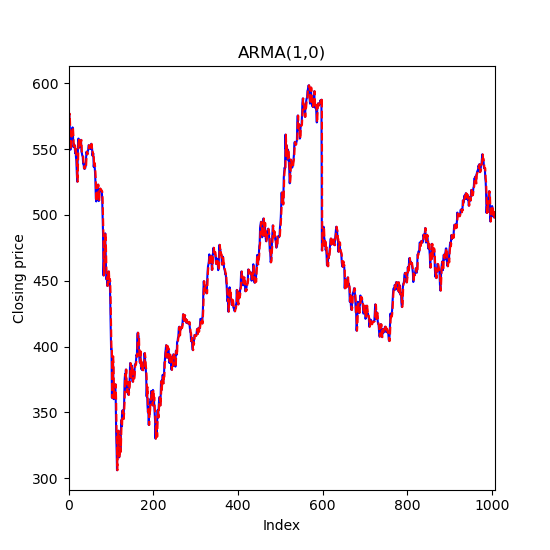

In [15]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ibm_df['Close_Price'].plot(color='b', linestyle = '-', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price')
plt.show()

From the preceding plot, it can be seen that the variance of the process keeps increasing on the end of the dataset and there is a strong trend that is observed in ACF

In [16]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

<IPython.core.display.Javascript object>


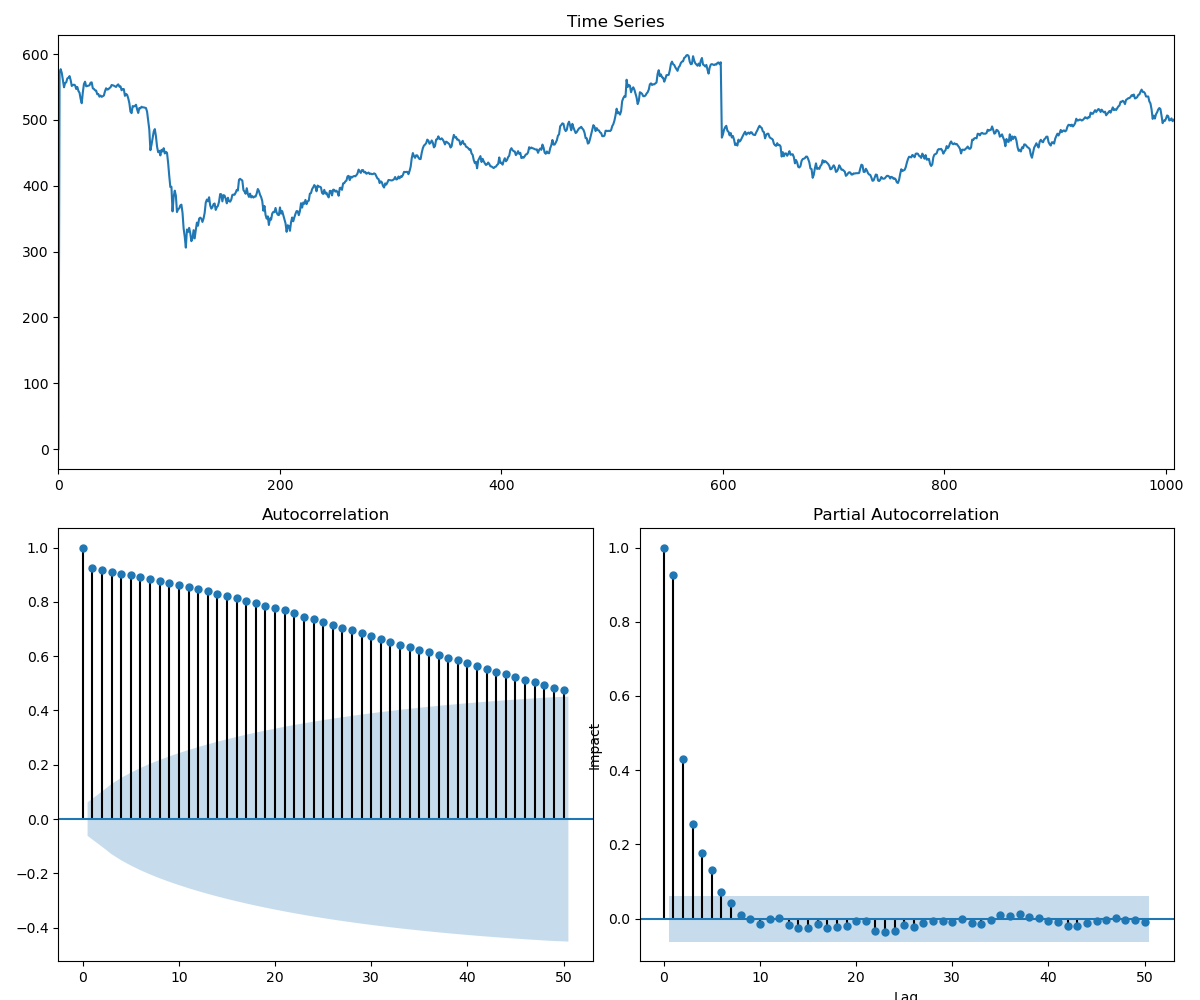

Text(0.5, 80.7222222222222, 'Lag')

In [21]:
plotds(ibm_df['ARMA'])
# Impluse response curve
# plt.plot(arima_process.arma_impulse_response(ari, maj, nobs=20))
plt.ylabel("Impact")
plt.xlabel("Lag")